# S07 T01: Tasca del test d'hipòtesis

In [97]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

## Exercici 1. Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

De l'Sprint06, carreguem les dades netes, sense nuls, amb l'històric de jugadors de la selecció espanyola de futbol absolut masculina que han debutat (obtingudes a partir de la web bdfutbol.com). Recordem els noms de les columnes:
- Sobrenom; Nom; Data Naixement; Lloc de Naixament; Província; País; Partits Jugats; Partits Titular; Partits Complets; Partits Suplent; Partits Substituït; Partits Convocats (sense jugar); Partits Guanyats; Partits Empetats; Partits Perduts; Minuts; Goles; Gols Penalt; Goles pròpia porta; Gols Encaixats; Targetes grogues; Targetes vermelles; Edat inicial; Edat final; Alçada; Pes

In [98]:
jugadors = pd.read_csv('C:\\Users\\Silvia\\Desktop\\rubenIT\\DataSources\\jugadores00.csv')#importem i li assignem un nom de dataframe

In [99]:
#Imprimim les dades filtrades per comprovar la importació
print(jugadors.describe())
print(jugadors.head(10))
print(jugadors.tail(10))

               PJ          PT          PC          PS          PX          PG  \
count  654.000000  654.000000  654.000000  654.000000  654.000000  654.000000   
mean    14.155963   11.085627    8.006116    3.070336    3.056575    8.391437   
std     22.460518   19.330256   14.271486    5.229901    7.115855   15.330149   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    1.000000    0.000000    0.000000    1.000000   
50%      5.000000    4.000000    3.000000    1.000000    1.000000    3.000000   
75%     16.000000   12.000000    9.000000    3.000000    3.000000    9.000000   
max    180.000000  161.000000  125.000000   42.000000   59.000000  131.000000   

               PE          PP           Min           G          GP  \
count  654.000000  654.000000    654.000000  654.000000  654.000000   
mean     3.333333    2.431193   1005.507645    1.960245    0.142202   
std      4.831199    3.607972   1669.924268    5.165109  

Consultem les dades estadístiques de l'atribut "Altura" per fer-nos una idea de com formular la hipòtesi.

In [100]:
jugadors.Altura.describe()

count    654.000000
mean     177.594801
std        6.021862
min      160.000000
25%      173.000000
50%      178.000000
75%      181.750000
max      197.000000
Name: Altura, dtype: float64

### Farem servir el Mètode Z-score, amb alpha level del 5%, i right-tailed score.

### Step 1 & 2. Establim Null H. i Alternate H.
Podem formular la hipòtesi següent:
Si escollim un jugador i té origen extranger (Provincia="Extranjero"), llavors és més alt o igual que la mitjana general, en concret 180 cm.

Null Hypothesis H0: mu<=180
Alternative Hypothesis H1: mu>180

La probabilitat d'escollir un jugador és 1 entre 654 jugadors seleccionats.

In [101]:
P=1/jugadors.Altura.count()
print(P)
print("{:.4%}".format(P))

0.0015290519877675841
0.1529%


### Step 3. Dibuixem les dades
Dibuixem la campana de Gauss o distribució de l'atribut "Altura" amb seaborn per tenir una visualització de les dades.

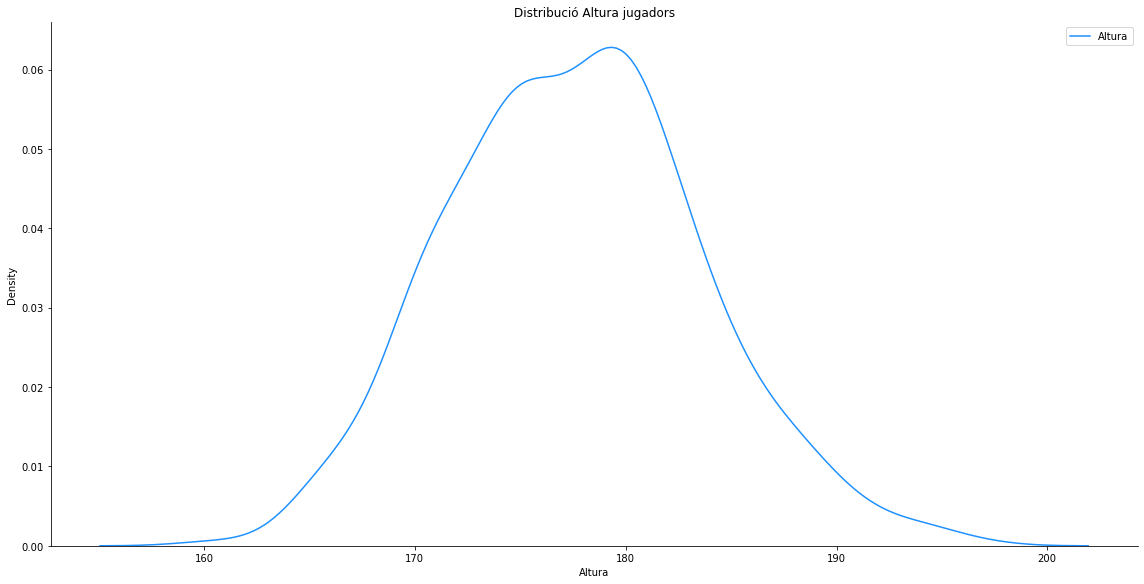

In [102]:
sns.displot(data=jugadors,x="Altura", color="dodgerblue", label="Altura",kind="kde",height=8,aspect=2)
plt.title("Distribució Altura jugadors")
plt.legend()

### Step 4. Establim nivell alpha

In [103]:
#95% de confiança
alpha=0.05

### Step 5. Trobem àrea de regió rebuig (rejection region) de la taula z per un àrea 0.05, o la calculem amb Python. L'àrea corresponent és el p-value.###
Establim right-tailed.

In [104]:
import scipy.stats as st
Zscore=st.norm.ppf(0.95)
print("Àrea de 5% (taula Z cal fer 0.5-0.05=0.495) = Z-score de " + str(Zscore))

#Comprovem la correcta aplicació de rejection
confident=st.norm.cdf(Zscore)
print("Confident: " + str(confident))

Àrea de 5% (taula Z cal fer 0.5-0.05=0.495) = Z-score de 1.6448536269514722
Confident: 0.95


Exemple de la campana Gauss amb el Z-score:
![https://i.stack.imgur.com/fGYNp.png](https://i.stack.imgur.com/fGYNp.png)

En el nostre cas i de la forma que hem aplicat el mètode, compararem el Z-score amb Z-statistic. Degut a què hem marcat el límit per trobar Z-score amb alpha=0.05, treuríem el 5% de la meitat de la corba perquè analitzem només la cua dreta. Per taula Z, Z-score per 0.50-0.05=0.45 és 1.645, que coincideix amb el valor de càlcul de Python.

P-value en aquest cas és l'àrea que manca per completar el 100% ó 1 de la distribució normal (1-confiança=1-0.95=0.05).

Aquesta forma de treballar segueix el procediment marcat a la web:

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/

In [105]:
p_value = (1 - confident)
print('p-value = ', round(p_value, 4))

p-value =  0.05


### Step 6. Find the test statistics Z=(promig-mu)/(desv.estàndard/arrel_quadrada(n))

In [106]:
a=jugadors[jugadors.Provincia=="Extranjero"]

In [107]:
AltExtranger=180
Z=(AltExtranger-jugadors.Altura.mean())/(jugadors.Altura.std()/(np.sqrt(a.Altura.count())))
print("Test statistic= " + str(Z))

Test statistic= 2.259410633817534


Com que "Test Statistic Z", del pas 6, és 2.259 > (Zscore = 1.644), del pas 5, podem rebutjar la hipòtesi nul·la.

**Donada la hipòtesis que els jugadors d'origen extranger que han passat per la selecció fan més de 180 cm, i en conseqüència més alts que la mitjana de tots els jugadors, es comprova que aquesta hipòtesis nul·la es pot rebutjar, tot i que l'alçada mitjana deuen ser molt semblants.**


***WE CAN REJECT NULL HYPOTHESIS***


Si apliquem un filtre a les dades, i trobem la mitjana de l'Altura dels jugadors extrangers, veurem que aquesta és de 177.406 cm, no gaire lluny dels 177.59 de la mitjana de tots els jugadors.

També és important veure que la mostra és més gran que 30 individus. Al contrari, no s'hagués pogut fer el mètode Z-score.

In [108]:
b=a.Altura.mean()
print("Mitjana jugadors d'origen Extranger: " + str(b))
print(a.Altura.describe())

Mitjana jugadors d'origen Extranger: 177.40625
count     32.000000
mean     177.406250
std        5.452785
min      168.000000
25%      174.000000
50%      176.500000
75%      180.000000
max      191.000000
Name: Altura, dtype: float64


### Podem aplicar el Mètode P-value approach. En aquest cas, els graus de llibertat són n-1.


### Step 1. Formulació de la hipòtesi
Recordem la hipòtesi:
- Null Hypothesis H0: mu<=180
- Alternative Hypothesis H1: mu>180

### Step 2. Assumim que N.H. és veritat, i calculem t* o valor del test estadístic

In [109]:
AltExtranger=180
t=(AltExtranger-jugadors.Altura.mean())/(jugadors.Altura.std()/(np.sqrt(a.Altura.count()-1)))
print("Test statistic t*= " + str(t))

Test statistic t*= 2.2238271401631597


### Step 3. Calculem el valor P-value per right-tailed test per t* i n=a.Altura.count()-1=32-1=31

In [110]:
#Passem la t calculada i df(degrees freedom)
P_value_t=scipy.stats.t.sf(abs(t),df=a.Altura.count()-1)
print("P-value t*: " + str(P_value_t))

P-value t*: 0.01679012867942746


Establim el nivell de significança alpha01 en 0.05 (5%) i alpha02 en 0.01 (1%), i comparem.

In [111]:
alpha01=0.05

if P_value_t<= alpha01:
    print("P-value <= alpha 0.05 (5%). Reject Null Hypothesis in favour of the Alternative Hypothesis.")
else:
    print("P-value > alpha 0.05 (5%). Do not reject Null Hypothesis.")

P-value <= alpha 0.05 (5%). Reject Null Hypothesis in favour of the Alternative Hypothesis.


In [112]:
alpha02=0.01

if P_value_t<= alpha02:
    print("P-value <= alpha 0.01 (1%). Reject Null Hypothesis in favour of the Alternative Hypothesis.")
else:
    print("P-value > alpha 0.01 (1%). Do not reject Null Hypothesis.")

P-value > alpha 0.01 (1%). Do not reject Null Hypothesis.


**Conclusió:**

Amb nivell alpha o nivell de significança 0.01 (1%), no rebutjaríem la Hipòtesi Nul·la (és més possible que es compleixi la hipòtesi nul·la que els jugadors d'origen extranger fan 180 cm).

Tanmateix, com en el cas anterior Z-score, amb un 5% de significança al t-score, també rebutjaríem la hipòtesi nul·la.


Recordem què és alpha:

*El nivel de significancia, también denotado como alfa o α, es la probabilidad de rechazar la hipótesis nula cuando es verdadera. Por ejemplo, un nivel de significancia de 0.05 indica un riesgo de 5% de concluir que existe una diferencia cuando en realidad no hay ninguna diferencia.*

## Exercici 2. Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgem la hipòtesi nul·la agafant un alfa de 5%.

### Step 1. Formulació hipòtesi
Escollirem els atributs d'alçada i procedència originària del jugador, establint les següents hipòtesis:

- Null Hypothesis H0: mu_alçada_extranger-mu_alçada_nacional = 0
- Alternative Hypothesis H1: mu_alçada_extranger-mu_alçada_nacional <> 0

In [113]:
j_extrangers=jugadors[jugadors.Provincia=="Extranjero"]
j_nacionals=jugadors[jugadors.Provincia!="Extranjero"]
print(j_extrangers.Altura.describe())
print(j_nacionals.Altura.describe())

count     32.000000
mean     177.406250
std        5.452785
min      168.000000
25%      174.000000
50%      176.500000
75%      180.000000
max      191.000000
Name: Altura, dtype: float64
count    622.000000
mean     177.604502
std        6.053533
min      160.000000
25%      173.000000
50%      178.000000
75%      182.000000
max      197.000000
Name: Altura, dtype: float64


### Step 2. Càlcul de la t-estadística i del P-value. Comparem el test amb alpha 5% i la probabilitat de fer un error Tipus-I.

In [114]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(j_extrangers["Altura"],j_nacionals["Altura"])
print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("Probablement és la mateixa distribució. No rebutgem la Hipòtesi Nul·la.")
else:
    print("Probablement NO és la mateixa distribució. Rebutgem la Hipòtesi Nul·la.")

stat=-0.181, p=0.856
Probablement és la mateixa distribució. No rebutgem la Hipòtesi Nul·la.


In [115]:
print("Alçada mitja origen extranger: " + str(j_extrangers.Altura.mean()))
print("Alçada mitja origen nacional: " + str(j_nacionals.Altura.mean()))
print("Diferència mus: " + str((j_extrangers.Altura.mean())-(j_nacionals.Altura.mean())))

Alçada mitja origen extranger: 177.40625
Alçada mitja origen nacional: 177.60450160771705
Diferència mus: -0.1982516077170544


### Step 3. Dibuixem les dades

Dibuixem les dades per tenir una visió del test, i comprovar que s'assemblen en gran mesura totes dues mostres.

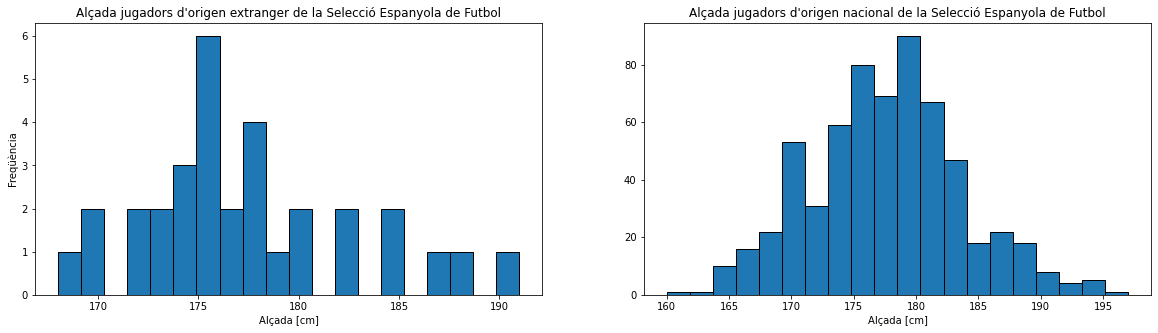

In [116]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(j_extrangers["Altura"], edgecolor='k', bins=20)
plt.title("Alçada jugadors d'origen extranger de la Selecció Espanyola de Futbol",fontsize=12)
plt.xlabel("Alçada [cm]")
plt.ylabel("Freqüència")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(j_nacionals["Altura"], edgecolor='k', bins=20)
plt.title("Alçada jugadors d'origen nacional de la Selecció Espanyola de Futbol",fontsize=12)
plt.xlabel("Alçada [cm]")


plt.show()

Mx: 191.0
Mn: 168.0
Meitat: 179.5


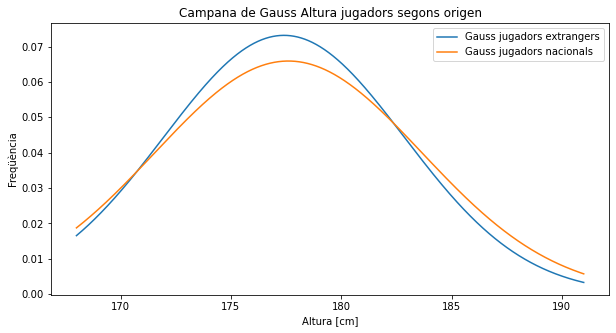

In [117]:
fig = plt.figure(figsize=(10,5))

sd_ex=j_extrangers["Altura"].std(ddof=1)
mean_ex=j_extrangers["Altura"].mean()

#centrem la campana
maxim=j_extrangers["Altura"].max()
print("Mx: " + str(maxim))
minim=j_extrangers["Altura"].min()
print("Mn: " + str(minim))
meitat=maxim-(maxim-minim)/2
print("Meitat: " + str(meitat))

x_axis = np.arange(minim, maxim, 0.01) 

sd_nac=j_nacionals["Altura"].std(ddof=1)
mean_nac=j_nacionals["Altura"].mean()

ax3=plt.plot(x_axis, norm.pdf(x_axis, mean_ex, sd_ex),label="Gauss jugadors extrangers")
ax4=plt.plot(x_axis, norm.pdf(x_axis, mean_nac, sd_nac),label="Gauss jugadors nacionals")


plt.legend(loc="upper right")


#ax3=jugadors["Altura"].plot.density(label="Densitat (Pandas)",legend=True)

plt.xlabel("Altura [cm]")
plt.ylabel("Freqüència")
plt.title("Campana de Gauss Altura jugadors segons origen")


plt.show()

***Conclusió:***

Tenim una probabilitat de <=5% d'escollir un jugador d'origen extranger i que la seva Altura mitja no sigui comparable a la d'un jugador d'origen nacional; és a dir, les seves altures segeuixen la mateixa distribució en un 95%.

## Exercici 3. Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5

### Step 1. Hipòtesi.
Seleccionarem 3 atributs per a aqueslls jugadors que han marcat un gol o més: partits jugats, minuts jugats i gols marcats.

Formulem la hipòtesi:
- Null Hypothesis H0: mitjanes iguals.
- Alternative Hypothesis H1: mitjanes diferents com a mínim en una de les mostres.

In [118]:
j_golejadors=jugadors[jugadors.G>0]
j_golejadors01=j_golejadors.loc[:,["PJ","Min","G"]]
print(j_golejadors01.describe())

               PJ           Min           G
count  247.000000    247.000000  247.000000
mean    25.595142   1776.121457    5.190283
std     27.963791   2035.143576    7.347378
min      1.000000     18.000000    1.000000
25%      7.000000    540.000000    1.000000
50%     16.000000   1093.000000    3.000000
75%     32.500000   2292.500000    6.000000
max    180.000000  13709.000000   59.000000


### Step 2. Mètode de testeig. Càlcul P-value i estadístic.
Aplicarem ANOVA (Analysis of variance), segons explicació a la web:

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/


*Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.
Assumptions:
*- Observations in each sample are independent and identically distributed (iid).
*- Observations in each sample are normally distributed.
*- Observations in each sample have the same variance.
*- Interpretation

*- H0: the means of the samples are equal.
*- H1: one or more of the means of the samples are unequal.*

In [119]:
from scipy.stats import f_oneway
j_PJ = j_golejadors01["PJ"]
j_Min = j_golejadors01["Min"]
j_G = j_golejadors01["G"]
stat, p = f_oneway(j_PJ, j_Min, j_G)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Probablement és la mateixa distribució. No rebutgem la Hipòtesi Nul·la.")
else:
    print("Probablement NO és la mateixa distribució. Rebutgem la Hipòtesi Nul·la.")

stat=184.862, p=0.000
Probablement NO és la mateixa distribució. Rebutgem la Hipòtesi Nul·la.


### Step 3. Dibuixem la distribució dels 3 atributs.

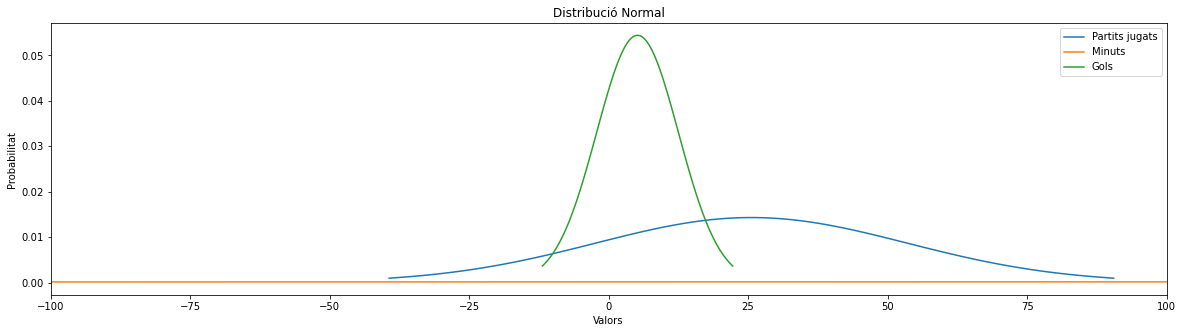

In [124]:
fig = plt.figure(figsize=(20,5))

mu_J, sigma_J = np.mean(j_PJ), np.std(j_PJ)
normal_J = stats.norm(mu_J, sigma_J)
x_J = np.linspace(normal_J.ppf(0.01),normal_J.ppf(0.99), 100)
fp_J = normal_J.pdf(x_J) # Función de Probabilidad
ax_J=plt.plot(x_J, fp_J,label="Partits jugats")


mu_Min, sigma_Min = np.mean(j_Min), np.std(j_Min)
normal_Min = stats.norm(mu_Min, sigma_Min)
x_Min = np.linspace(normal_Min.ppf(0.01),normal_Min.ppf(0.99), 100)
fp_Min = normal_Min.pdf(x_Min) # Función de Probabilidad
ax_Min=plt.plot(x_Min, fp_Min,label="Minuts")


mu_G, sigma_G = np.mean(j_G), np.std(j_G)
normal_G = stats.norm(mu_G, sigma_G)
x_G = np.linspace(normal_G.ppf(0.01),normal_G.ppf(0.99), 100)
fp_G = normal_G.pdf(x_G) # Función de Probabilidad
ax_G=plt.plot(x_G, fp_G,label="Gols")

plt.legend(loc="upper right")


plt.xlim(-100,100)
plt.title('Distribució Normal')
plt.ylabel('Probabilitat')
plt.xlabel('Valors')
plt.show()

***Conclusió:***

En el dibuix es pot veure com les distribucions normals de cada una de les dades no s'assemblen, corroborant el càlcul que ens assenyala que NO tenen la mateixa distribució i que, per tant, es rebutja la hipòtesi nul·la.